### Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.utils import shuffle
from skimage.transform import resize

### Read all the file names in all 4 folders (messi, neymer,ronaldo)

In [3]:
messi = glob.glob('messi/*.jpg')
neymer = glob.glob('neymer/*.jpg')
ronaldo = glob.glob('ronaldo/*.jpg')


In [4]:
len (messi)

72

### Read image data from all files and store it in a variable, Store the label as well

In [8]:
image = []
label = []

for i in messi:
    img = plt.imread(i)
    image.append(img)
    label.append(0)
    
for i in neymer:
    img = plt.imread(i)
    image.append(img)
    label.append(1)
    
for i in ronaldo:
    img = plt.imread(i)
    image.append(img)
    label.append(2)
    


### Plot some of the images

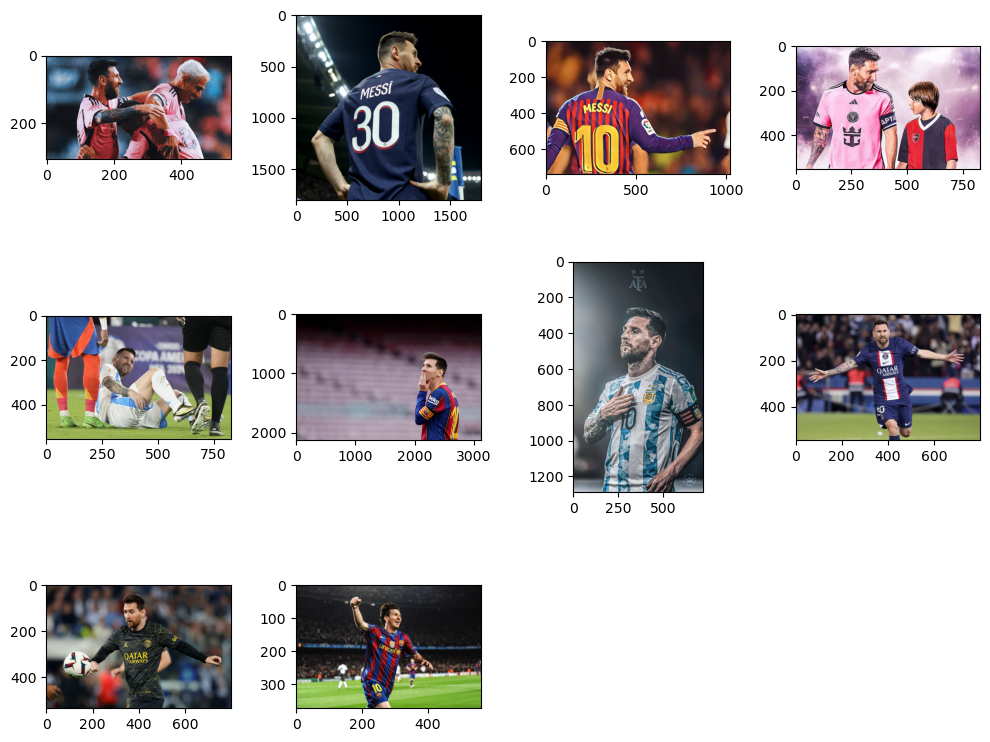

In [10]:
plt.figure(figsize = (10,8))
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
plt.tight_layout()

As you can see, all first images are of messi. We can use shuffle function in sklearn to shuffle the image data and labels

### Shuffle images and labels 

In [15]:
image, label = shuffle(image, label)

### Plot the images once again

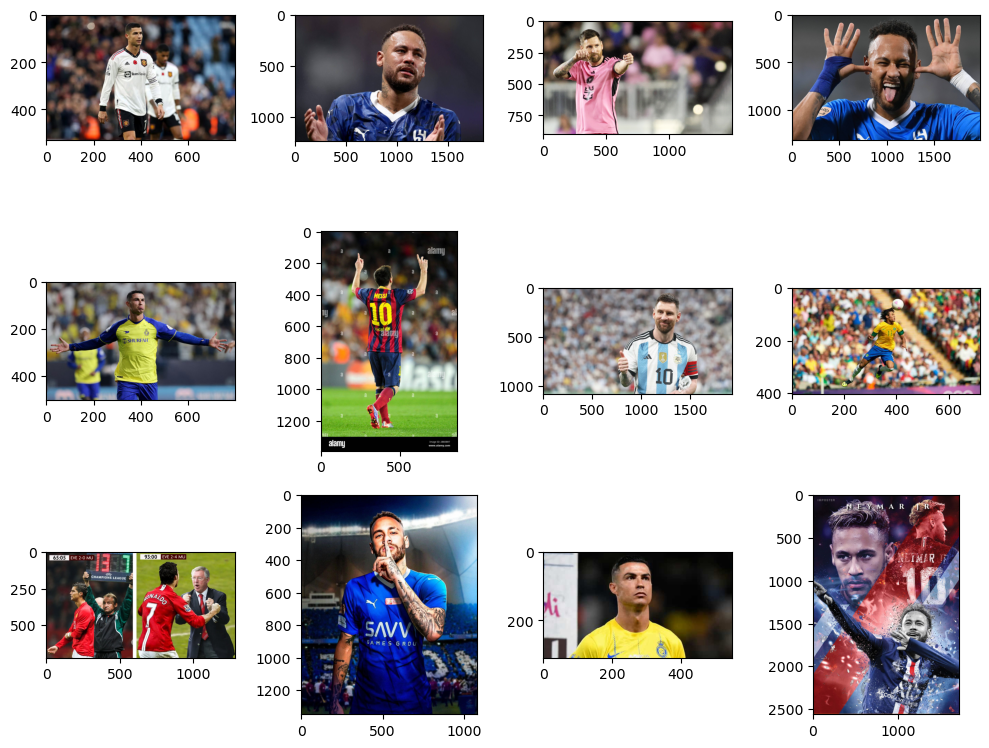

In [18]:
plt.figure(figsize = (10,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
plt.tight_layout()

### Check the shape of some of the images

In [21]:
for i in range(10):
    print(image[i].shape)

(531, 800, 3)
(1235, 1849, 3)
(900, 1500, 3)
(1320, 1980, 3)
(504, 800, 3)
(1390, 866, 3)
(1080, 1920, 3)
(405, 720, 3)
(720, 1280, 3)
(1349, 1080, 3)


As you can see, the geometry of each of the images vary. We have to resize all the image to have the same dimensions

### Resize all the images to a same height and width

In [25]:
X = []

for i in image:
    X.append(resize(i, (500,500,3)))

### Convert images and labels to numpy array and store them as X and y variables

In [27]:
X = np.array(X)

In [28]:
y = np.array(label)

### Reshape the images to 1 dimension

In [30]:
d1, d2, d3, d4 = X.shape

In [31]:
X = X.reshape((d1, d2*d3*d4))

### Train test Split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

### Create SVM Model and train it

In [36]:
from sklearn.svm import SVC

In [37]:
model = SVC()

In [38]:
%time model.fit(X_train, y_train)

CPU times: total: 55.1 s
Wall time: 32.4 s


SVC()

### Make predictions with X_test

In [ ]:
%time y_pred = model.predict(X_test)

### Evaluate the model

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [42]:
accuracy_score(y_test,y_pred)

0.95625

<AxesSubplot:>

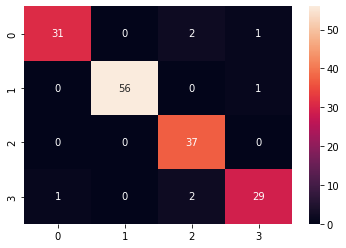

In [43]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        34
           1       1.00      0.98      0.99        57
           2       0.90      1.00      0.95        37
           3       0.94      0.91      0.92        32

    accuracy                           0.96       160
   macro avg       0.95      0.95      0.95       160
weighted avg       0.96      0.96      0.96       160



***